In [ ]:
# | default_exp data

In [ ]:
# | export
import fastcore.all as fc
import torch
from torch.utils.data import DataLoader, IterableDataset


In [ ]:
# | hide
from functools import partial

import matplotlib.pyplot as plt
from torch import nn

In [ ]:
# | export
class DataGenerator(IterableDataset):
    def __init__(self, n_batches, batch_generator):
        self.batch_generator = batch_generator
        self.n_batches = n_batches
        self.cnt = 0

    def __iter__(self):
        self.cnt = 0
        return self

    def __next__(self):
        if self.cnt >= self.n_batches: raise StopIteration
        self.cnt += 1
        return self.batch_generator()


@fc.delegates(DataLoader)
def dataloader(batch_generator, n_samples, **kwargs):
    return DataLoader(DataGenerator(n_samples // batch_generator.bs, batch_generator), batch_size=None, **kwargs)

### Tasks

In [ ]:
# | export
class LinearRegression:
    def __init__(self, bs, n_points=20, n_dim=10, std=0.1):
        self.bs, self.n_points, self.n_dim, self.std = bs, n_points, n_dim, std

    def __call__(self):
        xs = torch.randn(self.bs, self.n_points, self.n_dim)
        ws = torch.randn(self.bs, self.n_dim, 1)
        ys = torch.bmm(xs, ws).squeeze(-1)
        return xs, ys + self.std * torch.randn_like(ys)

In [ ]:
dl = dataloader(LinearRegression(bs=4, n_points=20, n_dim=1, std=0.1), 10)

In [ ]:
xb, yb = next(iter(dl))

<matplotlib.collections.PathCollection>

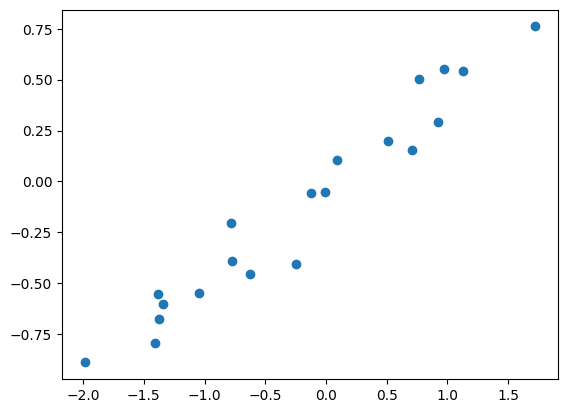

In [ ]:
plt.scatter(xb[0], yb[0])